# Notebook: Esplorazione, pulizia e normalizzazione dei dati
Questo notebook esegue:
- caricamento dei CSV in `data/`
- ispezione iniziale (shape, dtypes, missing)
- pulizia e normalizzazione di ID e date
- salvataggio dei dataset puliti in `data/processed`

In [43]:
# Celle di setup: import e impostazioni
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# impostazioni display pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

# crea cartella per dati processati
os.makedirs('data/processed', exist_ok=True)

In [44]:
# Definizione dei percorsi dei file (relativi alla workspace)
paths = {
    'prediction_mapping': 'data/prediction_mapping.csv',
    'sample_submission': 'data/sample_submission.csv',
    'materials': 'data/extended/materials.csv',
    'transportation': 'data/extended/transportation.csv',
    'purchase_orders': 'data/kernel/purchase_orders.csv',
    'receivals': 'data/kernel/receivals.csv',
}

for k,v in paths.items():
    print(f"{k}: {v}")

prediction_mapping: data/prediction_mapping.csv
sample_submission: data/sample_submission.csv
materials: data/extended/materials.csv
transportation: data/extended/transportation.csv
purchase_orders: data/kernel/purchase_orders.csv
receivals: data/kernel/receivals.csv


In [45]:
# Caricamento CSV principali (attenzione: alcuni file sono grandi)
print('Caricamento dei file...')
prediction_mapping = pd.read_csv(paths['prediction_mapping'], low_memory=False)
sample_submission = pd.read_csv(paths['sample_submission'], low_memory=False)
materials = pd.read_csv(paths['materials'], low_memory=False)
transportation = pd.read_csv(paths['transportation'], low_memory=False)
purchase_orders = pd.read_csv(paths['purchase_orders'], low_memory=False)
receivals = pd.read_csv(paths['receivals'], low_memory=False)

dfs = {
    'prediction_mapping': prediction_mapping,
    'sample_submission': sample_submission,
    'materials': materials,
    'transportation': transportation,
    'purchase_orders': purchase_orders,
    'receivals': receivals,
}

for name, df in dfs.items():
    print(f"{name}: shape={df.shape}, memory={df.memory_usage(deep=True).sum()/1024**2:.2f} MB")

Caricamento dei file...
prediction_mapping: shape=(30450, 4), memory=4.36 MB
sample_submission: shape=(30450, 2), memory=0.46 MB
materials: shape=(1218, 6), memory=0.20 MB
transportation: shape=(122590, 23), memory=42.67 MB
purchase_orders: shape=(33171, 12), memory=14.24 MB
receivals: shape=(122590, 10), memory=24.90 MB
prediction_mapping: shape=(30450, 4), memory=4.36 MB
sample_submission: shape=(30450, 2), memory=0.46 MB
materials: shape=(1218, 6), memory=0.20 MB
transportation: shape=(122590, 23), memory=42.67 MB
purchase_orders: shape=(33171, 12), memory=14.24 MB
receivals: shape=(122590, 10), memory=24.90 MB


In [46]:
# 1) Ispezione iniziale: head e dtypes per ogni dataframe
for name, df in dfs.items():
    print('\n' + '='*80)
    print(f"DataFrame: {name}")
    display(df.head())
    print('\nDtypes:')
    print(df.dtypes)
    try:
        print('\nInfo:')
        df.info()
    except Exception as e:
        pass


DataFrame: prediction_mapping


,ID,rm_id,forecast_start_date,forecast_end_date
0,1,365,2025-01-01,2025-01-02
1,2,365,2025-01-01,2025-01-03
2,3,365,2025-01-01,2025-01-04
3,4,365,2025-01-01,2025-01-05
4,5,365,2025-01-01,2025-01-06



Dtypes:
ID                      int64
rm_id                   int64
forecast_start_date    object
forecast_end_date      object
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   30450 non-null  int64 
 1   rm_id                30450 non-null  int64 
 2   forecast_start_date  30450 non-null  object
 3   forecast_end_date    30450 non-null  object
dtypes: int64(2), object(2)
memory usage: 951.7+ KB

DataFrame: sample_submission


,ID,predicted_weight
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0



Dtypes:
ID                  int64
predicted_weight    int64
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                30450 non-null  int64
 1   predicted_weight  30450 non-null  int64
dtypes: int64(2)
memory usage: 475.9 KB

DataFrame: materials


,rm_id,product_id,product_version,raw_material_alloy,raw_material_format_type,stock_location
0,NaN,NaN,NaN,NaN,NaN,NaN
1,342.0,91900170.0,1.0,SB06 Traders,24.0,DELETED_28.02:2011_SB06 anodiz
2,343.0,91900143.0,2.0,SB02 606035,24.0,SB 02
3,345.0,91900143.0,2.0,SA10 606035,3.0,DELETED_28.02:2011_ST01
4,346.0,91900146.0,2.0,SA15 600540,3.0,DELETED_28.02:2011_SA 300370



Dtypes:
rm_id                       float64
product_id                  float64
product_version             float64
raw_material_alloy           object
raw_material_format_type    float64
stock_location               object
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rm_id                     1217 non-null   float64
 1   product_id                1217 non-null   float64
 2   product_version           1217 non-null   float64
 3   raw_material_alloy        1217 non-null   object 
 4   raw_material_format_type  1217 non-null   float64
 5   stock_location            1217 non-null   object 
dtypes: float64(4), object(2)
memory usage: 57.2+ KB

DataFrame: transportation


,rm_id,product_id,purchase_order_id,purchase_order_item_no,receival_item_no,batch_id,transporter_name,vehicle_no,unit_status,vehicle_start_weight,vehicle_end_weight,gross_weight,tare_weight,net_weight,wood,ironbands,plastic,water,ice,other,chips,packaging,cardboard
0,365.0,91900143.0,208545.0,10.0,1,NaN,Transporter0,Vehicle0,Transferred,40040.0,14740.0,11540.0,120.0,11420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,365.0,91900143.0,208545.0,10.0,2,NaN,Transporter0,Vehicle0,Transferred,40040.0,14740.0,13760.0,0.0,13760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,365.0,91900143.0,208490.0,10.0,1,NaN,Transporter1,Vehicle1,Transferred,39940.0,15280.0,11577.0,296.0,11281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,365.0,91900143.0,208490.0,10.0,2,NaN,Transporter1,Vehicle1,Transferred,39940.0,15280.0,13083.0,0.0,13083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,379.0,91900296.0,210435.0,20.0,1,NaN,Transporter2,Vehicle2,Transferred,39360.0,15180.0,24180.0,270.0,23910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Dtypes:
rm_id                     float64
product_id                float64
purchase_order_id         float64
purchase_order_item_no    float64
receival_item_no            int64
batch_id                  float64
transporter_name           object
vehicle_no                 object
unit_status                object
vehicle_start_weight      float64
vehicle_end_weight        float64
gross_weight              float64
tare_weight               float64
net_weight                float64
wood                      float64
ironbands                 float64
plastic                   float64
water                     float64
ice                       float64
other                     float64
chips                     float64
packaging                 float64
cardboard                 float64
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122590 entries, 0 to 122589
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------            

,purchase_order_id,purchase_order_item_no,quantity,delivery_date,product_id,product_version,created_date_time,modified_date_time,unit_id,unit,status_id,status
0,1,1,-14.0,2003-05-12 00:00:00.0000000 +02:00,91900143,1,2003-05-12 10:00:48.0000000 +00:00,2004-06-15 06:16:18.0000000 +00:00,NaN,NaN,2,Closed
1,22,1,23880.0,2003-05-27 00:00:00.0000000 +02:00,91900160,1,2003-05-27 12:42:07.0000000 +00:00,2012-06-29 09:41:13.0000000 +00:00,NaN,NaN,2,Closed
2,41,1,0.0,2004-03-08 00:00:00.0000000 +01:00,91900143,1,2004-03-08 13:44:31.0000000 +00:00,2012-07-04 13:51:02.0000000 +00:00,NaN,NaN,2,Closed
3,61,1,0.0,2004-03-10 00:00:00.0000000 +01:00,91900143,1,2004-03-10 11:39:06.0000000 +00:00,2012-07-04 13:50:59.0000000 +00:00,NaN,NaN,2,Closed
4,141,10,25000.0,2004-10-28 00:00:00.0000000 +02:00,91900143,1,2004-10-22 12:21:54.0000000 +00:00,2012-07-04 13:50:55.0000000 +00:00,NaN,NaN,2,Closed



Dtypes:
purchase_order_id           int64
purchase_order_item_no      int64
quantity                  float64
delivery_date              object
product_id                  int64
product_version             int64
created_date_time          object
modified_date_time         object
unit_id                   float64
unit                       object
status_id                   int64
status                     object
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33171 entries, 0 to 33170
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_order_id       33171 non-null  int64  
 1   purchase_order_item_no  33171 non-null  int64  
 2   quantity                33171 non-null  float64
 3   delivery_date           33171 non-null  object 
 4   product_id              33171 non-null  int64  
 5   product_version         33171 non-null  int64  
 6   created_date_time       

,rm_id,product_id,purchase_order_id,purchase_order_item_no,receival_item_no,batch_id,date_arrival,receival_status,net_weight,supplier_id
0,365.0,91900143.0,208545.0,10.0,1,NaN,2004-06-15 13:34:00 +02:00,Completed,11420.0,52062
1,365.0,91900143.0,208545.0,10.0,2,NaN,2004-06-15 13:34:00 +02:00,Completed,13760.0,52062
2,365.0,91900143.0,208490.0,10.0,1,NaN,2004-06-15 13:38:00 +02:00,Completed,11281.0,50468
3,365.0,91900143.0,208490.0,10.0,2,NaN,2004-06-15 13:38:00 +02:00,Completed,13083.0,50468
4,379.0,91900296.0,210435.0,20.0,1,NaN,2004-06-15 13:40:00 +02:00,Completed,23910.0,52577



Dtypes:
rm_id                     float64
product_id                float64
purchase_order_id         float64
purchase_order_item_no    float64
receival_item_no            int64
batch_id                  float64
date_arrival               object
receival_status            object
net_weight                float64
supplier_id                 int64
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122590 entries, 0 to 122589
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rm_id                   122533 non-null  float64
 1   product_id              122533 non-null  float64
 2   purchase_order_id       122537 non-null  float64
 3   purchase_order_item_no  122537 non-null  float64
 4   receival_item_no        122590 non-null  int64  
 5   batch_id                64765 non-null   float64
 6   date_arrival            122590 non-null  object 
 7   receival_status         1225

In [47]:
# 2) Missing-value summary e unique counts per colonne chiave
def missing_summary(df):
    miss = df.isnull().sum().rename('missing_count')
    pct = (df.isnull().mean()*100).rename('missing_pct')
    return pd.concat([miss, pct], axis=1).sort_values('missing_count', ascending=False)

keys = ['rm_id','product_id','purchase_order_id']
for name, df in dfs.items():
    print('\n' + '-'*60)
    print(f"Dataset: {name} - shape {df.shape}")
    ms = missing_summary(df)
    display(ms.head(20))
    for k in keys:
        if k in df.columns:
            print(f"Unique count {k}: {df[k].nunique(dropna=True)}")


------------------------------------------------------------
Dataset: prediction_mapping - shape (30450, 4)


,missing_count,missing_pct
ID,0,0.0
rm_id,0,0.0
forecast_start_date,0,0.0
forecast_end_date,0,0.0


Unique count rm_id: 203

------------------------------------------------------------
Dataset: sample_submission - shape (30450, 2)


,missing_count,missing_pct
ID,0,0.0
predicted_weight,0,0.0



------------------------------------------------------------
Dataset: materials - shape (1218, 6)


,missing_count,missing_pct
rm_id,1,0.082102
product_id,1,0.082102
product_version,1,0.082102
raw_material_alloy,1,0.082102
raw_material_format_type,1,0.082102
stock_location,1,0.082102


Unique count rm_id: 203
Unique count product_id: 54

------------------------------------------------------------
Dataset: transportation - shape (122590, 23)


,missing_count,missing_pct
chips,114801,93.646301
ice,114796,93.642222
water,114792,93.638959
cardboard,114757,93.610409
packaging,114739,93.595726
other,114193,93.150339
ironbands,111502,90.955217
plastic,106573,86.934497
wood,97313,79.380863
batch_id,57825,47.169427


Unique count rm_id: 203
Unique count product_id: 54
Unique count purchase_order_id: 7173

------------------------------------------------------------
Dataset: purchase_orders - shape (33171, 12)


,missing_count,missing_pct
modified_date_time,492,1.483223
unit_id,44,0.132646
unit,44,0.132646
purchase_order_id,0,0.000000
delivery_date,0,0.000000
quantity,0,0.000000
purchase_order_item_no,0,0.000000
product_id,0,0.000000
created_date_time,0,0.000000
product_version,0,0.000000


Unique count product_id: 77
Unique count purchase_order_id: 8135

------------------------------------------------------------
Dataset: receivals - shape (122590, 10)


,missing_count,missing_pct
batch_id,57825,47.169427
net_weight,68,0.055469
product_id,57,0.046496
rm_id,57,0.046496
purchase_order_item_no,53,0.043234
purchase_order_id,53,0.043234
receival_item_no,0,0.000000
date_arrival,0,0.000000
receival_status,0,0.000000
supplier_id,0,0.000000


Unique count rm_id: 203
Unique count product_id: 54
Unique count purchase_order_id: 7173


In [48]:
# 3) Funzioni di pulizia/normalizzazione tipi e parsing date
def to_int64_nullable(s):
    # rimuove .0 finale quando presente e converte con Int64 (nullable)
    s = s.replace(r"\.0$", "", regex=True).astype('Int64')
    return s

def normalize_id_columns(df, cols):
    for c in cols:
        if c in df.columns:
            # gestisci stringhe vuote
            df[c] = df[c].replace('', pd.NA)
            # se float -> converti mantenendo NaN
            df[c] = pd.to_numeric(df[c], errors='coerce')
            # converti a Int64 nullable quando possibile
            df[c] = df[c].where(df[c].notna(), pd.NA).astype('Int64')
    return df

# parsing date helper
def try_parse_dates(df, date_cols):
    for c in date_cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], errors='coerce')
    return df

# Applica conversioni su tutti i dataframe rilevanti
id_cols_by_df = {
    'prediction_mapping':['rm_id'],
    'materials':['rm_id','product_id'],
    'transportation':['rm_id','product_id','purchase_order_id','purchase_order_item_no','receival_item_no'],
    'purchase_orders':['purchase_order_id','product_id','purchase_order_item_no'],
    'receivals':['rm_id','product_id','purchase_order_id','purchase_order_item_no','receival_item_no'],
}

date_cols_by_df = {
    'purchase_orders':['delivery_date','created_date_time','modified_date_time'],
    'receivals':['date_arrival'],
    'prediction_mapping':['forecast_start_date','forecast_end_date'],
}

for name, df in dfs.items():
    cols = id_cols_by_df.get(name, [])
    if cols:
        dfs[name] = normalize_id_columns(df, cols)
    dcols = date_cols_by_df.get(name, [])
    if dcols:
        dfs[name] = try_parse_dates(dfs[name], dcols)

# pulizia testo per materials: drop righe vuote e strip
if 'materials' in dfs:
    m = dfs['materials']
    # sostituisci stringhe vuote con NaN e drop righe completamente vuote
    m = m.replace('', pd.NA).dropna(how='all')
    # trim whitespace su colonne stringa
    str_cols = m.select_dtypes(include='object').columns.tolist()
    for c in str_cols:
        m[c] = m[c].astype('string').str.strip()
    dfs['materials'] = m

/tmp/ipykernel_12788/122063182.py:22: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df[c] = pd.to_datetime(df[c], errors='coerce')
/tmp/ipykernel_12788/122063182.py:22: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df[c] = pd.to_datetime(df[c], errors='coerce')
/tmp/ipykernel_12788/122063182.py:22: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=Tru

In [49]:
# 4) Sanity checks: distribuzioni e confronto net_weight
for name in ['receivals','transportation']:
    if name in dfs:
        print('\n' + '='*60)
        print(f"Statistiche net_weight per {name}")
        if 'net_weight' in dfs[name].columns:
            display(dfs[name]['net_weight'].describe())
        else:
            print('Colonna net_weight non presente')

# confronta counts per purchase_order_id tra receivals e transportation
if 'receivals' in dfs and 'transportation' in dfs:
    r_counts = dfs['receivals'].groupby('purchase_order_id').size().rename('receivals_count')
    t_counts = dfs['transportation'].groupby('purchase_order_id').size().rename('transportation_count')
    counts = pd.concat([r_counts, t_counts], axis=1).fillna(0).astype('int64')
    display(counts.sort_values(['receivals_count','transportation_count'], ascending=False).head(10))


Statistiche net_weight per receivals


count    122522.000000
mean      12972.566543
std        8264.652621
min           0.000000
25%        5660.000000
50%       12380.000000
75%       21120.000000
max       31626.000000
Name: net_weight, dtype: float64


Statistiche net_weight per transportation


count    122522.000000
mean      12972.566543
std        8264.652621
min           0.000000
25%        5660.000000
50%       12380.000000
75%       21120.000000
max       31626.000000
Name: net_weight, dtype: float64

,receivals_count,transportation_count
purchase_order_id,,
300251,977,977
212960,939,939
212958,675,675
212970,565,565
212977,534,534
295350,533,533
212961,489,489
295346,477,477
307605,468,468


In [50]:
# 5) Esempio di merge per un purchase_order sample e controllo mismatch
sample_po = None
if not purchase_orders.empty:
    sample_po = purchase_orders['purchase_order_id'].dropna().unique()[0]
    print(f"Esempio purchase_order_id sample: {sample_po}")
    r_sub = dfs['receivals'][dfs['receivals']['purchase_order_id'] == sample_po]
    t_sub = dfs['transportation'][dfs['transportation']['purchase_order_id'] == sample_po]
    print('receivals slice shape:', r_sub.shape)
    print('transportation slice shape:', t_sub.shape)
    # merge sui campi item quando presenti
    merged = pd.merge(r_sub, t_sub, how='outer', left_on=['purchase_order_id','receival_item_no'], right_on=['purchase_order_id','receival_item_no'], suffixes=('_rec','_trans'))
    display(merged.head(20))
else:
    print('Nessun purchase_orders disponibile per sample')

Esempio purchase_order_id sample: 1
receivals slice shape: (0, 10)
transportation slice shape: (0, 23)


,rm_id_rec,product_id_rec,purchase_order_id,purchase_order_item_no_rec,receival_item_no,batch_id_rec,date_arrival,receival_status,net_weight_rec,supplier_id,rm_id_trans,product_id_trans,purchase_order_item_no_trans,batch_id_trans,transporter_name,vehicle_no,unit_status,vehicle_start_weight,vehicle_end_weight,gross_weight,tare_weight,net_weight_trans,wood,ironbands,plastic,water,ice,other,chips,packaging,cardboard


In [51]:
# 6) Salvataggio dei dataset puliti in data/processed
for name, df in dfs.items():
    out_path = f"data/processed/{name}_cleaned.csv"
    try:
        df.to_csv(out_path, index=False)
        print(f"Salvato: {out_path} (shape={df.shape})")
    except Exception as e:
        print(f"Errore salvando {name}: {e}")

Salvato: data/processed/prediction_mapping_cleaned.csv (shape=(30450, 4))
Salvato: data/processed/sample_submission_cleaned.csv (shape=(30450, 2))
Salvato: data/processed/materials_cleaned.csv (shape=(1217, 6))
Salvato: data/processed/transportation_cleaned.csv (shape=(122590, 23))
Salvato: data/processed/transportation_cleaned.csv (shape=(122590, 23))
Salvato: data/processed/purchase_orders_cleaned.csv (shape=(33171, 12))
Salvato: data/processed/purchase_orders_cleaned.csv (shape=(33171, 12))
Salvato: data/processed/receivals_cleaned.csv (shape=(122590, 10))
Salvato: data/processed/receivals_cleaned.csv (shape=(122590, 10))


Date normalizzate a UTC (quando possibile)


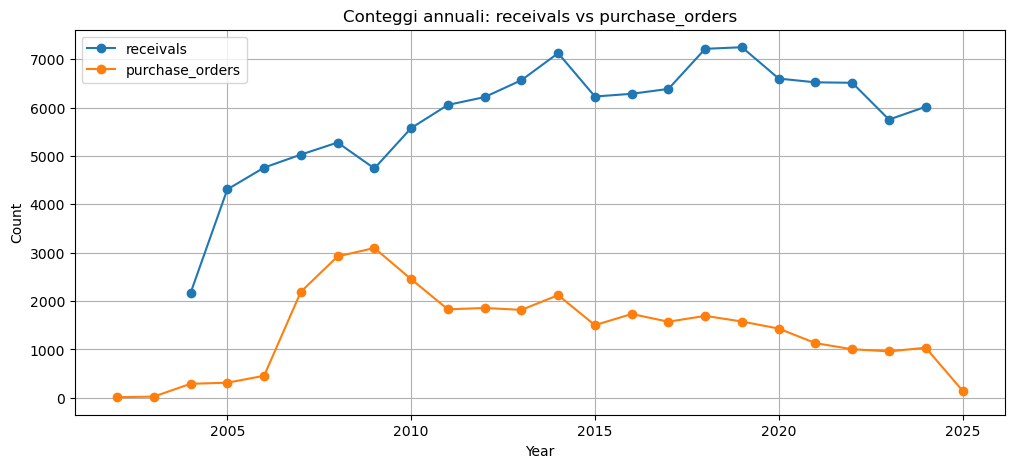

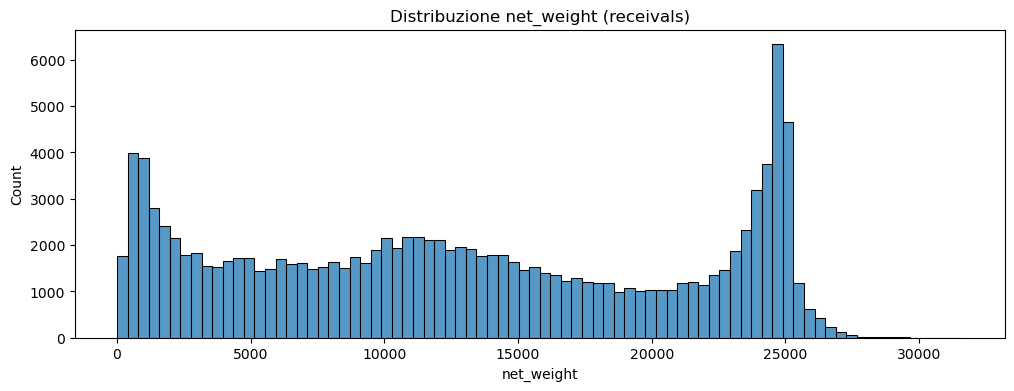

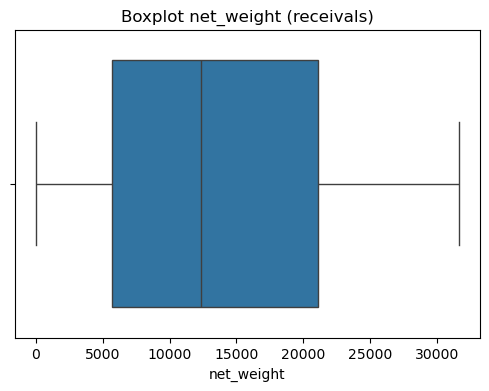

In [52]:
## Normalizzazione date (UTC) e visualizzazioni temporali
# Normalizzo le colonne date principali in UTC per avere coerenza nelle aggregazioni
date_cols_all = {
    'prediction_mapping':['forecast_start_date','forecast_end_date'],
    'purchase_orders':['delivery_date','created_date_time','modified_date_time'],
    'receivals':['date_arrival'],
}
for name, cols in date_cols_all.items():
    if name in dfs:
        for c in cols:
            if c in dfs[name].columns:
                dfs[name][c] = pd.to_datetime(dfs[name][c], errors='coerce', utc=True)
print('Date normalizzate a UTC (quando possibile)')

# Visualizzazioni: conteggi per anno e per mese dei receivals e purchase_orders
plt.figure(figsize=(12,5))
if 'receivals' in dfs:
    r = dfs['receivals'].copy()
    r['year'] = r['date_arrival'].dt.year
    r_year = r.groupby('year').size()
    plt.plot(r_year.index, r_year.values, marker='o', label='receivals')
if 'purchase_orders' in dfs:
    p = dfs['purchase_orders'].copy()
    # delivery_date può essere NaT dopo parsing; usare created_date_time come fallback per trend
    p['year'] = p['delivery_date'].dt.year.fillna(p['created_date_time'].dt.year)
    p_year = p.groupby('year').size()
    plt.plot(p_year.index, p_year.values, marker='o', label='purchase_orders')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Conteggi annuali: receivals vs purchase_orders')
plt.legend()
plt.grid(True)
plt.show()

# Istogramma net_weight (receivals) e boxplot rapido
if 'receivals' in dfs:
    plt.figure(figsize=(12,4))
    sns.histplot(dfs['receivals']['net_weight'].dropna(), bins=80, kde=False)
    plt.title('Distribuzione net_weight (receivals)')
    plt.xlabel('net_weight')
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=dfs['receivals']['net_weight'].dropna())
    plt.title('Boxplot net_weight (receivals)')
    plt.show()

In [53]:
## Costruzione tabella master per modelling
# Strategia: per ogni riga di `prediction_mapping` (ID con rm_id + forecast window)
# - unisco metadata da materials
# - calcolo aggregazioni storiche su receivals per il relativo `rm_id`
# - calcolo feature nello window [forecast_start_date - 365d, forecast_start_date)
pm = dfs['prediction_mapping'].copy()
# assicuriamoci che forecast_start_date sia datetime UTC
pm['forecast_start_date'] = pd.to_datetime(pm['forecast_start_date'], errors='coerce', utc=True)
pm['forecast_end_date'] = pd.to_datetime(pm['forecast_end_date'], errors='coerce', utc=True)

# aggregazioni globali per rm_id (storico)
rec = dfs['receivals'].copy()
# assicurarsi date coerenti
rec['date_arrival'] = pd.to_datetime(rec['date_arrival'], errors='coerce', utc=True)
agg_all = rec.groupby('rm_id').agg(total_received_all=('net_weight','sum'),
                                       mean_received_all=('net_weight','mean'),
                                       std_received_all=('net_weight','std'),
                                       count_received_all=('net_weight','count'),
                                       last_receival_date=('date_arrival','max'))
agg_all = agg_all.reset_index()

# per velocizzare calcoli window, creo mapping rm_id -> dataframe ordinato per date
rm_to_df = {}
for rid, g in rec.groupby('rm_id'):
    g2 = g[['date_arrival','net_weight']].sort_values('date_arrival')
    rm_to_df[rid] = g2

# funzione che, dato rm_id e forecast_start_date, calcola sum/mean/count nell'ultimo anno
def features_for_row(rm_id, start_dt):
    out = {'sum_365': pd.NA, 'mean_365': pd.NA, 'count_365': 0, 'last_net_weight': pd.NA}
    if pd.isna(rm_id) or rm_id not in rm_to_df or pd.isna(start_dt):
        return out
    df_rm = rm_to_df[rm_id]
    window_start = start_dt - pd.Timedelta(days=365)
    mask = (df_rm['date_arrival'] < start_dt) & (df_rm['date_arrival'] >= window_start)
    sel = df_rm.loc[mask, 'net_weight']
    if sel.size>0:
        out['sum_365'] = sel.sum()
        out['mean_365'] = sel.mean()
        out['count_365'] = int(sel.count())
    # last net weight before start_dt
    prior = df_rm[df_rm['date_arrival'] < start_dt]
    if not prior.empty:
        out['last_net_weight'] = prior.sort_values('date_arrival')['net_weight'].iloc[-1]
    return out

# Applico la funzione riga-per-riga su pm (attenzione: operazione relativamente costosa ma fattibile)
feat_rows = []
for idx, row in pm.iterrows():
    rid = row.get('rm_id')
    start_dt = row.get('forecast_start_date')
    feats = features_for_row(rid, start_dt)
    feat_rows.append(feats)

feat_df = pd.DataFrame(feat_rows)
master = pd.concat([pm.reset_index(drop=True), feat_df.reset_index(drop=True)], axis=1)

# unisco metadata materials su rm_id (se presente)
if 'materials' in dfs:
    master = master.merge(dfs['materials'].drop_duplicates(subset=['rm_id']), how='left', on='rm_id')

# unisco aggregazioni storiche all-time (agg_all) su rm_id
master = master.merge(agg_all, how='left', on='rm_id')

# salvo master per modelling
master_path = 'data/processed/master_for_modeling.csv'
master.to_csv(master_path, index=False)
print('Salvato master:', master_path, 'shape:', master.shape)

Salvato master: data/processed/master_for_modeling.csv shape: (30450, 18)


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset, DataLoader

# ===== CARICA MASTER_FOR_MODELING =====
df_master = pd.read_csv('data/processed/master_for_modeling.csv')
df_receivals = pd.read_csv('data/processed/receivals_cleaned.csv')

In [57]:
# ===== CREA SEQUENZE TEMPORALI CON FEATURE ENGINEERING COMPLETO =====
def create_sequences_rich(df_receivals, df_materials=None, lookback=30, horizon=151):
    """
    Crea sequenze temporali RICCHE usando TUTTI i dataset disponibili.
    
    Feature Temporali (da sequenze):
    - Cumulative weight
    - Rolling mean (7, 14, 30 giorni)
    - Rolling std (7, 30 giorni)
    - Weight differences (1st, 2nd order)
    - Days since last delivery
    - Day of week (0-6)
    - Month (1-12)
    - Quarter (1-4)
    
    Feature Statiche (per rm_id):
    - Total historical weight
    - Average weight per delivery
    - Std of weights
    - Count of deliveries
    - Material category (se disponibile)
    
    Total: ~18-20 feature per timestep
    """
    sequences_list = []
    
    # Filtra NaN e valori invalidi
    df_receivals = df_receivals.dropna(subset=['rm_id', 'date_arrival', 'net_weight'])
    df_receivals = df_receivals[df_receivals['net_weight'] >= 0]
    
    # Pre-calcola statistiche globali per rm_id
    rm_stats = df_receivals.groupby('rm_id').agg({
        'net_weight': ['sum', 'mean', 'std', 'count']
    }).reset_index()
    rm_stats.columns = ['rm_id', 'total_weight', 'avg_weight', 'std_weight', 'count_deliveries']
    rm_stats['std_weight'] = rm_stats['std_weight'].fillna(0)
    rm_stats_dict = rm_stats.set_index('rm_id').to_dict('index')
    
    # Carica info materiali se disponibile
    material_info = {}
    if df_materials is not None:
        for _, row in df_materials.iterrows():
            rm_id = row.get('rm_id')
            if pd.notna(rm_id):
                # Codifica categorica semplice (potremmo usare one-hot)
                material_info[rm_id] = {
                    'product_id': hash(str(row.get('product_id', 0))) % 1000,  # Hash numerico
                }
    
    print(f"Processing {df_receivals['rm_id'].nunique()} unique rm_ids...")
    
    for rm_id in df_receivals['rm_id'].unique():
        df_rm = df_receivals[df_receivals['rm_id'] == rm_id].sort_values('date_arrival')
        
        if len(df_rm) < lookback + horizon:
            continue
        
        # Converti date a datetime
        df_rm['date_arrival_dt'] = pd.to_datetime(df_rm['date_arrival'], utc=True)
        
        # ===== FEATURE TEMPORALI =====
        
        # 1. Cumulative weight
        df_rm['cumsum_weight'] = df_rm['net_weight'].cumsum()
        
        # 2-4. Rolling means (multiple windows)
        df_rm['rolling_mean_7'] = df_rm['net_weight'].rolling(window=7, min_periods=1).mean()
        df_rm['rolling_mean_14'] = df_rm['net_weight'].rolling(window=14, min_periods=1).mean()
        df_rm['rolling_mean_30'] = df_rm['net_weight'].rolling(window=30, min_periods=1).mean()
        
        # 5-6. Rolling std (volatility)
        df_rm['rolling_std_7'] = df_rm['net_weight'].rolling(window=7, min_periods=1).std().fillna(0)
        df_rm['rolling_std_30'] = df_rm['net_weight'].rolling(window=30, min_periods=1).std().fillna(0)
        
        # 7-8. Differences (velocity and acceleration)
        df_rm['weight_diff_1'] = df_rm['net_weight'].diff(1).fillna(0)
        df_rm['weight_diff_2'] = df_rm['net_weight'].diff(2).fillna(0)
        
        # 9. Days since last delivery
        df_rm['days_since_last'] = df_rm['date_arrival_dt'].diff().dt.days.fillna(1).clip(upper=365)
        
        # 10-12. Time features (seasonality)
        df_rm['day_of_week'] = df_rm['date_arrival_dt'].dt.dayofweek  # 0-6
        df_rm['month'] = df_rm['date_arrival_dt'].dt.month  # 1-12
        df_rm['quarter'] = df_rm['date_arrival_dt'].dt.quarter  # 1-4
        
        # 13. Normalized weight (current / average)
        avg_weight = rm_stats_dict.get(rm_id, {}).get('avg_weight', 1)
        df_rm['weight_normalized'] = df_rm['net_weight'] / (avg_weight + 1e-8)
        
        # ===== FEATURE STATICHE (ripetute per ogni timestep) =====
        stats = rm_stats_dict.get(rm_id, {})
        df_rm['rm_total_weight'] = stats.get('total_weight', 0)
        df_rm['rm_avg_weight'] = stats.get('avg_weight', 0)
        df_rm['rm_std_weight'] = stats.get('std_weight', 0)
        df_rm['rm_count_deliveries'] = stats.get('count_deliveries', 0)
        
        # Material info (se disponibile)
        mat_info = material_info.get(rm_id, {})
        df_rm['product_id_hash'] = mat_info.get('product_id', 0)
        
        # Estrai arrays
        feature_names = [
            'cumsum_weight', 'rolling_mean_7', 'rolling_mean_14', 'rolling_mean_30',
            'rolling_std_7', 'rolling_std_30', 'weight_diff_1', 'weight_diff_2',
            'days_since_last', 'day_of_week', 'month', 'quarter', 'weight_normalized',
            'rm_total_weight', 'rm_avg_weight', 'rm_std_weight', 'rm_count_deliveries',
            'product_id_hash'
        ]
        
        dates = df_rm['date_arrival'].values
        cumsum = df_rm['cumsum_weight'].values
        
        # Crea matrice di feature (N, n_features)
        feature_matrix = df_rm[feature_names].values
        
        # Verifica NaN/Inf
        if np.any(np.isnan(feature_matrix)) or np.any(np.isinf(feature_matrix)):
            continue
        
        # Genera sequenze sliding window
        for i in range(len(cumsum) - lookback - horizon):
            x_seq = feature_matrix[i:i+lookback, :]  # (30, 18)
            y_target = cumsum[i+lookback+horizon-1] - cumsum[i+lookback-1]
            
            # Salta sequenze problematiche
            if np.any(np.isnan(x_seq)) or np.any(np.isinf(x_seq)) or np.isnan(y_target) or y_target < 0:
                continue
            
            sequences_list.append({
                'rm_id': rm_id,
                'X': x_seq.astype(np.float32),
                'y': y_target,
                'start_date': dates[i],
                'end_date': dates[i+lookback+horizon-1]
            })
    
    return sequences_list

# Carica materials per feature aggiuntive
try:
    df_materials = pd.read_csv('data/processed/materials_cleaned.csv')
    print("Materials loaded successfully")
except:
    df_materials = None
    print("Materials not found, using only temporal features")

sequences = create_sequences_rich(df_receivals, df_materials, lookback=30, horizon=151)
print(f"\nSequenze generate: {len(sequences)}")

# Verifica dimensioni feature
if len(sequences) > 0:
    n_features = sequences[0]['X'].shape[1]
    print(f"Shape di una sequenza X: {sequences[0]['X'].shape}")
    print(f"Numero di feature: {n_features}")
    print(f"\nFeature list:")
    feature_list = [
        'cumsum_weight', 'rolling_mean_7', 'rolling_mean_14', 'rolling_mean_30',
        'rolling_std_7', 'rolling_std_30', 'weight_diff_1', 'weight_diff_2',
        'days_since_last', 'day_of_week', 'month', 'quarter', 'weight_normalized',
        'rm_total_weight', 'rm_avg_weight', 'rm_std_weight', 'rm_count_deliveries',
        'product_id_hash'
    ]
    for i, feat in enumerate(feature_list):
        print(f"  {i+1:2d}. {feat}")


Materials loaded successfully
Processing 203 unique rm_ids...

Sequenze generate: 109517
Shape di una sequenza X: (30, 18)
Numero di feature: 18

Feature list:
   1. cumsum_weight
   2. rolling_mean_7
   3. rolling_mean_14
   4. rolling_mean_30
   5. rolling_std_7
   6. rolling_std_30
   7. weight_diff_1
   8. weight_diff_2
   9. days_since_last
  10. day_of_week
  11. month
  12. quarter
  13. weight_normalized
  14. rm_total_weight
  15. rm_avg_weight
  16. rm_std_weight
  17. rm_count_deliveries
  18. product_id_hash

Sequenze generate: 109517
Shape di una sequenza X: (30, 18)
Numero di feature: 18

Feature list:
   1. cumsum_weight
   2. rolling_mean_7
   3. rolling_mean_14
   4. rolling_mean_30
   5. rolling_std_7
   6. rolling_std_30
   7. weight_diff_1
   8. weight_diff_2
   9. days_since_last
  10. day_of_week
  11. month
  12. quarter
  13. weight_normalized
  14. rm_total_weight
  15. rm_avg_weight
  16. rm_std_weight
  17. rm_count_deliveries
  18. product_id_hash


In [ ]:
print(f"Sequenze generate: {len(sequences)}")

Sequenze generate: 109517


In [60]:
# ===== DATASET CLASS (Updated per multi-feature) =====
class SequentialWeightDataset(Dataset):
    def __init__(self, sequences, fit_scaler=False):
        self.sequences = sequences
        
        # Estrai tutte le X per fitting dello scaler
        all_x = np.vstack([seq['X'] for seq in sequences])  # (N*30, n_features)
        self.n_features = all_x.shape[1]
        
        print(f"Dataset: {len(sequences)} sequences, Feature shape: {all_x.shape}")
        
        # StandardScaler per normalizzazione multi-feature
        if fit_scaler:
            self.scaler = StandardScaler()
            self.scaler.fit(all_x)
            print(f"Scaler fitted on {all_x.shape[0]} samples with {self.n_features} features")
        else:
            self.scaler = None
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        seq = self.sequences[idx]
        X = seq['X'].copy()  # (30, n_features)
        y = seq['y']
        rm_id = seq['rm_id']
        
        # Normalizza se scaler disponibile
        if self.scaler is not None:
            X = self.scaler.transform(X)  # (30, n_features) -> (30, n_features)
        
        return torch.FloatTensor(X), torch.FloatTensor([y]), rm_id

# Split train/val
np.random.seed(42)
indices = np.random.permutation(len(sequences))
split_idx = int(0.8 * len(sequences))
train_indices = indices[:split_idx]
val_indices = indices[split_idx:]

train_sequences = [sequences[i] for i in train_indices]
val_sequences = [sequences[i] for i in val_indices]

# Crea dataset
train_ds = SequentialWeightDataset(train_sequences, fit_scaler=True)
val_ds = SequentialWeightDataset(val_sequences, fit_scaler=False)
val_ds.scaler = train_ds.scaler  # Usa stesso scaler del train

# DataLoader
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=64, shuffle=False, num_workers=2)

print(f"Train set: {len(train_ds)} samples")
print(f"Val set: {len(val_ds)} samples")
print(f"Feature dimensionality: {train_ds.n_features}")


Dataset: 87613 sequences, Feature shape: (2628390, 18)
Scaler fitted on 2628390 samples with 18 features
Dataset: 21904 sequences, Feature shape: (657120, 18)
Train set: 87613 samples
Val set: 21904 samples
Feature dimensionality: 18
Scaler fitted on 2628390 samples with 18 features
Dataset: 21904 sequences, Feature shape: (657120, 18)
Train set: 87613 samples
Val set: 21904 samples
Feature dimensionality: 18


In [ ]:
# ===== DIAGNOSTICA DATI =====
print("Verifica qualità dei dati:")
print(f"Numero totale sequenze: {len(sequences)}")

if len(sequences) > 0:
    # Controlla X
    all_X = np.array([seq['X'] for seq in sequences])
    print(f"\nX (input sequences):")
    print(f"  Shape: {all_X.shape}")
    print(f"  Min: {all_X.min():.2f}, Max: {all_X.max():.2f}")
    print(f"  Mean: {all_X.mean():.2f}, Std: {all_X.std():.2f}")
    print(f"  NaN count: {np.isnan(all_X).sum()}")
    print(f"  Inf count: {np.isinf(all_X).sum()}")
    
    # Controlla y
    all_y = np.array([seq['y'] for seq in sequences])
    print(f"\ny (targets):")
    print(f"  Shape: {all_y.shape}")
    print(f"  Min: {all_y.min():.2f}, Max: {all_y.max():.2f}")
    print(f"  Mean: {all_y.mean():.2f}, Std: {all_y.std():.2f}")
    print(f"  NaN count: {np.isnan(all_y).sum()}")
    print(f"  Inf count: {np.isinf(all_y).sum()}")
    print(f"  Negative count: {(all_y < 0).sum()}")
    
    # Mostra alcuni esempi
    print(f"\nPrimi 3 target values: {all_y[:3]}")
    print(f"Ultimi 3 target values: {all_y[-3:]}")
else:
    print("ERRORE: Nessuna sequenza generata!")


Verifica qualità dei dati:
Numero totale sequenze: 109517

X (input sequences):
  Shape: (109517, 30, 5)
  Min: -28944.00, Max: 348544890.00
  Mean: 15570454.21, Std: 50900796.57
  NaN count: 0
  Mean: 15570454.21, Std: 50900796.57
  NaN count: 0
  Inf count: 0

y (targets):
  Shape: (109517,)
  Min: 197589.00, Max: 3802480.00
  Mean: 1950017.72, Std: 860616.67
  NaN count: 0
  Inf count: 0
  Negative count: 0

Primi 3 target values: [2192261. 2196381. 2197181.]
Ultimi 3 target values: [2145530. 2156710. 2156190.]
  Inf count: 0

y (targets):
  Shape: (109517,)
  Min: 197589.00, Max: 3802480.00
  Mean: 1950017.72, Std: 860616.67
  NaN count: 0
  Inf count: 0
  Negative count: 0

Primi 3 target values: [2192261. 2196381. 2197181.]
Ultimi 3 target values: [2145530. 2156710. 2156190.]


In [ ]:
# ===== METRICHE ADDIZIONALI PER INTERPRETABILITÀ =====
def calculate_metrics(model, loader, device, scaler=None):
    """
    Calcola metriche interpretabili oltre alla quantile loss
    """
    model.eval()
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for X_batch, y_batch, rm_ids in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            y_pred = model(X_batch)
            
            all_preds.extend(y_pred.cpu().numpy().flatten())
            all_targets.extend(y_batch.cpu().numpy().flatten())
    
    all_preds = np.array(all_preds)
    all_targets = np.array(all_targets)
    
    # Metriche
    mae = np.mean(np.abs(all_preds - all_targets))
    rmse = np.sqrt(np.mean((all_preds - all_targets)**2))
    mape = np.mean(np.abs((all_targets - all_preds) / (all_targets + 1e-8))) * 100
    
    # Percentuale di underestimation (vogliamo che sia conservativo)
    underest_pct = (all_preds < all_targets).mean() * 100
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Underestimation %': underest_pct,
        'Mean Prediction': all_preds.mean(),
        'Mean Target': all_targets.mean()
    }




In [61]:
# ===== MODELLO LSTM PER QUANTILE REGRESSION =====
class QuantileLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=3, dropout=0.15):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                            batch_first=True, dropout=dropout)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(64, 1)
    
    def forward(self, x):
        # x shape: (batch, seq_len, input_size)
        lstm_out, _ = self.lstm(x)
        # Usa l'ultimo output
        last_out = lstm_out[:, -1, :]  # (batch, hidden_size)
        out = self.fc1(last_out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out
    
    def quantile_loss(self, preds, target, tau=0.2):
        """Quantile loss per predizioni conservative"""
        errors = target - preds
        loss = torch.max((tau - 1) * errors, tau * errors)
        return loss.mean()

# Determina automaticamente input_size dal dataset
input_size = train_ds.n_features

print(f"\n{'='*60}")
print(f"LSTM Model Configuration")
print(f"{'='*60}")
print(f"Input size (features): {input_size}")
print(f"Hidden size: 128")
print(f"Num layers: 3")
print(f"Dropout: 0.15")
print(f"{'='*60}\n")

model = QuantileLSTM(input_size=input_size, hidden_size=128, num_layers=3, dropout=0.15)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Conta parametri
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
print(f"Device: {device}")

# Optimizer con learning rate ridotto per stabilità
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)



LSTM Model Configuration
Input size (features): 18
Hidden size: 128
Num layers: 3
Dropout: 0.15

Total parameters: 348,289
Device: cuda


In [62]:
def train_epoch(model, train_loader, optimizer, device):
    model.train()
    total_loss = 0.0
    num_batches = 0
    
    for X_batch, y_batch, rm_ids in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # Verifica NaN nei dati
        if torch.isnan(X_batch).any() or torch.isnan(y_batch).any():
            print(f"WARNING: NaN detected in batch, skipping...")
            continue
        
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        loss = model.quantile_loss(y_pred, y_batch)
        
        # Verifica NaN nella loss
        if torch.isnan(loss) or torch.isinf(loss):
            print(f"WARNING: NaN/Inf in loss, skipping batch")
            print(f"  y_pred range: [{y_pred.min():.2f}, {y_pred.max():.2f}]")
            print(f"  y_true range: [{y_batch.min():.2f}, {y_batch.max():.2f}]")
            continue
        
        loss.backward()
        
        # Gradient clipping per stabilità
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        total_loss += loss.item() * len(X_batch)
        num_batches += 1
    
    if num_batches == 0:
        return float('nan')
    
    return total_loss / len(train_loader.dataset)

def validate_epoch(model, val_loader, device):
    model.eval()
    total_loss = 0.0
    
    with torch.no_grad():
        for X_batch, y_batch, rm_ids in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            # Skip batch con NaN
            if torch.isnan(X_batch).any() or torch.isnan(y_batch).any():
                continue
            
            y_pred = model(X_batch)
            loss = model.quantile_loss(y_pred, y_batch)
            
            if not (torch.isnan(loss) or torch.isinf(loss)):
                total_loss += loss.item() * len(X_batch)
    
    return total_loss / len(val_loader.dataset)

# ===== TRAINING =====
# Prima crea la directory models se non esiste
import os
os.makedirs('models', exist_ok=True)

num_epochs = 100
patience = 15
best_val_loss = float('inf')
patience_counter = 0
history = {'train_loss': [], 'val_loss': []}

print("Starting training...")
for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, optimizer, device)
    val_loss = validate_epoch(model, val_loader, device)
    
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")
    
    # Se la loss è NaN, ferma il training
    if np.isnan(train_loss) or np.isnan(val_loss):
        print("ERROR: NaN loss detected, stopping training!")
        print("Debugging info:")
        print(f"  Number of training sequences: {len(train_ds)}")
        print(f"  Number of validation sequences: {len(val_ds)}")
        break
    
    scheduler.step(val_loss)
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'models/lstm_quantile_best.pt')
        print(f"  -> Best model saved (val_loss: {val_loss:.6f})")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Carica best model
if os.path.exists('models/lstm_quantile_best.pt'):
    model.load_state_dict(torch.load('models/lstm_quantile_best.pt'))
    print(f"\nBest model loaded with val_loss: {best_val_loss:.6f}")


Starting training...


Epoch 1/100 | Train Loss: 338898.743749 | Val Loss: 243199.227698
  -> Best model saved (val_loss: 243199.227698)
Epoch 2/100 | Train Loss: 175467.326613 | Val Loss: 104241.998008
  -> Best model saved (val_loss: 104241.998008)
Epoch 2/100 | Train Loss: 175467.326613 | Val Loss: 104241.998008
  -> Best model saved (val_loss: 104241.998008)
Epoch 3/100 | Train Loss: 94673.738916 | Val Loss: 82460.606579
  -> Best model saved (val_loss: 82460.606579)
Epoch 3/100 | Train Loss: 94673.738916 | Val Loss: 82460.606579
  -> Best model saved (val_loss: 82460.606579)
Epoch 4/100 | Train Loss: 87353.028207 | Val Loss: 81549.893775
  -> Best model saved (val_loss: 81549.893775)
Epoch 4/100 | Train Loss: 87353.028207 | Val Loss: 81549.893775
  -> Best model saved (val_loss: 81549.893775)
Epoch 5/100 | Train Loss: 84578.886300 | Val Loss: 72970.765077
  -> Best model saved (val_loss: 72970.765077)
Epoch 5/100 | Train Loss: 84578.886300 | Val Loss: 72970.765077
  -> Best model saved (val_loss: 72970.


TRAINING PROGRESS & INTERPRETATION


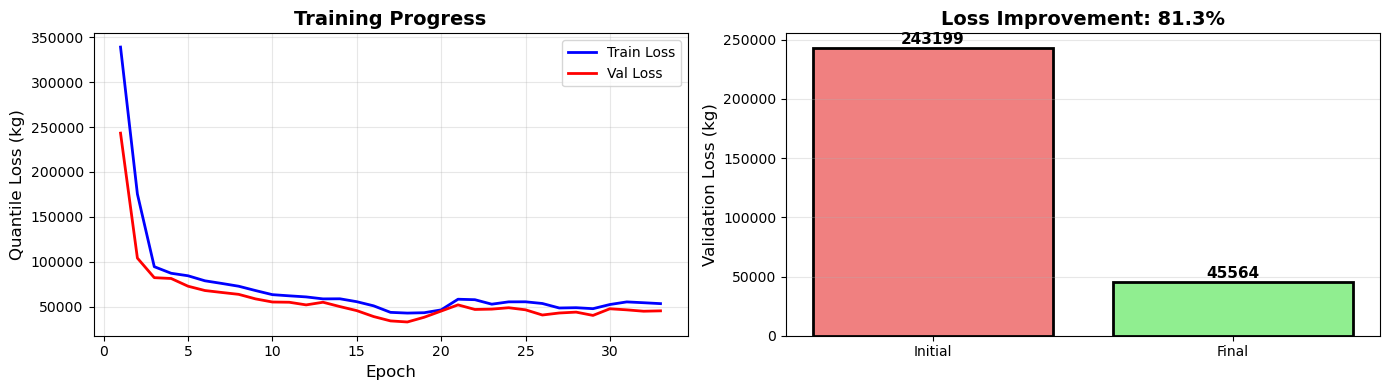


📊 INTERPRETAZIONE DEI RISULTATI:
--------------------------------------------------------------------------------
Loss iniziale:           243199 kg
Loss finale:              45564 kg
Best loss:                33189 kg
Miglioramento:             81.3%

✅ ECCELLENTE! Il modello ha imparato molto bene.

📈 METRICHE FINALI:
  MAE                 :    150739.42
  RMSE                :    198977.05
  MAPE                :         8.77
  Underestimation %   :        89.84
  Mean Prediction     :   1810407.12
  Mean Target         :   1951010.25

✅ Modello CONSERVATIVO (89.8% underestimation) - OTTIMO per il task!
  MAE                 :    150739.42
  RMSE                :    198977.05
  MAPE                :         8.77
  Underestimation %   :        89.84
  Mean Prediction     :   1810407.12
  Mean Target         :   1951010.25

✅ Modello CONSERVATIVO (89.8% underestimation) - OTTIMO per il task!


In [63]:
# ===== VISUALIZZAZIONE TRAINING =====
print("\n" + "="*80)
print("TRAINING PROGRESS & INTERPRETATION")
print("="*80)

# Plot training history
if len(history['train_loss']) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Loss plot
    epochs = range(1, len(history['train_loss']) + 1)
    axes[0].plot(epochs, history['train_loss'], 'b-', label='Train Loss', linewidth=2)
    axes[0].plot(epochs, history['val_loss'], 'r-', label='Val Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Quantile Loss (kg)', fontsize=12)
    axes[0].set_title('Training Progress', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Loss improvement percentage
    if len(history['val_loss']) > 1:
        initial_loss = history['val_loss'][0]
        final_loss = history['val_loss'][-1]
        improvement = ((initial_loss - final_loss) / initial_loss) * 100
        
        axes[1].bar(['Initial', 'Final'], [initial_loss, final_loss], 
                    color=['lightcoral', 'lightgreen'], edgecolor='black', linewidth=2)
        axes[1].set_ylabel('Validation Loss (kg)', fontsize=12)
        axes[1].set_title(f'Loss Improvement: {improvement:.1f}%', 
                         fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3, axis='y')
        
        # Aggiungi valori sulle barre
        for i, v in enumerate([initial_loss, final_loss]):
            axes[1].text(i, v + 500, f'{v:.0f}', ha='center', va='bottom', 
                        fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Interpretazione testuale
    print("\n📊 INTERPRETAZIONE DEI RISULTATI:")
    print("-" * 80)
    if len(history['val_loss']) > 1:
        initial = history['val_loss'][0]
        final = history['val_loss'][-1]
        best = min(history['val_loss'])
        
        print(f"Loss iniziale:       {initial:>10.0f} kg")
        print(f"Loss finale:         {final:>10.0f} kg")
        print(f"Best loss:           {best:>10.0f} kg")
        print(f"Miglioramento:       {improvement:>10.1f}%")
        
        if improvement > 50:
            print("\n✅ ECCELLENTE! Il modello ha imparato molto bene.")
        elif improvement > 30:
            print("\n✅ BUONO! Il modello sta convergendo correttamente.")
        elif improvement > 10:
            print("\n⚠️  DISCRETO. Potrebbe servire più training o feature engineering.")
        else:
            print("\n❌ PROBLEMA! Il modello non sta imparando abbastanza.")
        
        # Calcola metriche finali
        print("\n📈 METRICHE FINALI:")
        final_metrics = calculate_metrics(model, val_loader, device)
        for k, v in final_metrics.items():
            print(f"  {k:20s}: {v:>12.2f}")
        
        # Valuta se è conservativo (desiderabile per questo task)
        under_pct = final_metrics['Underestimation %']
        if under_pct > 60:
            print(f"\n✅ Modello CONSERVATIVO ({under_pct:.1f}% underestimation) - OTTIMO per il task!")
        elif under_pct > 40:
            print(f"\n⚠️  Modello BILANCIATO ({under_pct:.1f}% underestimation)")
        else:
            print(f"\n❌ Modello TROPPO OTTIMISTICO ({under_pct:.1f}% underestimation) - RISCHIO per smelting!")
    
    print("="*80)
else:
    print("❌ Nessun dato di training disponibile per la visualizzazione")


In [64]:
# ===== GENERA SUBMISSION CON 18 FEATURE =====
def generate_predictions_for_submission_rich(model, df_receivals, df_materials, df_mapping, device, scaler, rm_stats_dict, material_info):
    """
    Genera predizioni con TUTTE LE 18 FEATURE usate nel training
    """
    predictions = []
    model.eval()
    
    print("Pre-processing receivals data...")
    rm_data_dict = {}
    
    for rm_id in df_receivals['rm_id'].unique():
        df_rm = df_receivals[df_receivals['rm_id'] == rm_id].copy()
        
        # Converti date e ordina
        df_rm['date_arrival'] = pd.to_datetime(df_rm['date_arrival'], errors='coerce', utc=True)
        df_rm = df_rm.dropna(subset=['date_arrival', 'net_weight'])
        df_rm = df_rm.sort_values('date_arrival')
        
        if len(df_rm) < 30:
            continue
        
        df_rm['date_arrival_dt'] = df_rm['date_arrival']
        
        # ===== CALCOLA TUTTE LE 18 FEATURE (come nel training) =====
        df_rm['cumsum_weight'] = df_rm['net_weight'].cumsum()
        df_rm['rolling_mean_7'] = df_rm['net_weight'].rolling(window=7, min_periods=1).mean()
        df_rm['rolling_mean_14'] = df_rm['net_weight'].rolling(window=14, min_periods=1).mean()
        df_rm['rolling_mean_30'] = df_rm['net_weight'].rolling(window=30, min_periods=1).mean()
        df_rm['rolling_std_7'] = df_rm['net_weight'].rolling(window=7, min_periods=1).std().fillna(0)
        df_rm['rolling_std_30'] = df_rm['net_weight'].rolling(window=30, min_periods=1).std().fillna(0)
        df_rm['weight_diff_1'] = df_rm['net_weight'].diff(1).fillna(0)
        df_rm['weight_diff_2'] = df_rm['net_weight'].diff(2).fillna(0)
        df_rm['days_since_last'] = df_rm['date_arrival_dt'].diff().dt.days.fillna(1).clip(upper=365)
        df_rm['day_of_week'] = df_rm['date_arrival_dt'].dt.dayofweek
        df_rm['month'] = df_rm['date_arrival_dt'].dt.month
        df_rm['quarter'] = df_rm['date_arrival_dt'].dt.quarter
        
        # Feature normalizzata
        stats = rm_stats_dict.get(rm_id, {})
        avg_weight = stats.get('avg_weight', 1)
        df_rm['weight_normalized'] = df_rm['net_weight'] / (avg_weight + 1e-8)
        
        # Feature statiche
        df_rm['rm_total_weight'] = stats.get('total_weight', 0)
        df_rm['rm_avg_weight'] = stats.get('avg_weight', 0)
        df_rm['rm_std_weight'] = stats.get('std_weight', 0)
        df_rm['rm_count_deliveries'] = stats.get('count_deliveries', 0)
        
        # Material info
        mat_info = material_info.get(rm_id, {})
        df_rm['product_id_hash'] = mat_info.get('product_id', 0)
        
        # Salva ultimi 30 timestep con tutte le feature
        feature_names = [
            'cumsum_weight', 'rolling_mean_7', 'rolling_mean_14', 'rolling_mean_30',
            'rolling_std_7', 'rolling_std_30', 'weight_diff_1', 'weight_diff_2',
            'days_since_last', 'day_of_week', 'month', 'quarter', 'weight_normalized',
            'rm_total_weight', 'rm_avg_weight', 'rm_std_weight', 'rm_count_deliveries',
            'product_id_hash'
        ]
        
        feature_matrix = df_rm[feature_names].values
        
        # Salva ultimi 30 timestep
        if len(feature_matrix) >= 30:
            rm_data_dict[rm_id] = {
                'features': feature_matrix[-30:, :],  # (30, 18)
                'last_cumsum': df_rm['cumsum_weight'].iloc[-1]
            }
    
    print(f"Processing {len(df_mapping)} predictions...")
    
    with torch.no_grad():
        for idx, row in df_mapping.iterrows():
            row_id = row['ID']
            rm_id = row['rm_id']
            
            if rm_id not in rm_data_dict:
                # Fallback: predizione zero
                pred = 0.0
            else:
                # Prendi ultimi 30 timestep con 18 feature
                X_seq = rm_data_dict[rm_id]['features']  # (30, 18)
                
                # Normalizza usando lo stesso scaler del training
                X_seq_normalized = scaler.transform(X_seq)  # (30, 18)
                
                # Converti a tensor
                X_tensor = torch.FloatTensor(X_seq_normalized).unsqueeze(0).to(device)  # (1, 30, 18)
                
                # Predizione LSTM
                y_pred = model(X_tensor).item()
                
                # Clip a valori positivi
                pred = max(0.0, y_pred)
            
            predictions.append({
                'ID': row_id,
                'predicted_weight': pred
            })
            
            if (idx + 1) % 5000 == 0:
                print(f"Processed {idx+1}/{len(df_mapping)} predictions")
    
    return pd.DataFrame(predictions)

# Carica prediction_mapping
print("Caricamento prediction_mapping...")
df_mapping = pd.read_csv('data/prediction_mapping.csv')
print(f"Prediction mapping shape: {df_mapping.shape}")
print(f"Colonne: {list(df_mapping.columns)}")
print(f"Prime righe:")
print(df_mapping.head())

# Verifica che df_receivals sia caricato
if 'df_receivals' not in locals():
    print("\nCaricamento receivals...")
    df_receivals = pd.read_csv('data/processed/receivals_cleaned.csv')
    print(f"Receivals shape: {df_receivals.shape}")

# Carica materials se non già caricato
if 'df_materials' not in locals():
    try:
        df_materials = pd.read_csv('data/processed/materials_cleaned.csv')
        print(f"Materials shape: {df_materials.shape}")
    except:
        df_materials = None
        print("Materials not available")

# Pre-calcola rm_stats_dict e material_info (SAME AS TRAINING!)
print("\nPre-computing feature dictionaries...")
rm_stats = df_receivals.groupby('rm_id').agg({
    'net_weight': ['sum', 'mean', 'std', 'count']
}).reset_index()
rm_stats.columns = ['rm_id', 'total_weight', 'avg_weight', 'std_weight', 'count_deliveries']
rm_stats['std_weight'] = rm_stats['std_weight'].fillna(0)
rm_stats_dict = rm_stats.set_index('rm_id').to_dict('index')

material_info = {}
if df_materials is not None:
    for _, row in df_materials.iterrows():
        rm_id = row.get('rm_id')
        if pd.notna(rm_id):
            material_info[rm_id] = {
                'product_id': hash(str(row.get('product_id', 0))) % 1000,
            }

print("Feature dictionaries ready!")

# Genera predizioni
print("\n" + "="*60)
print("GENERAZIONE PREDIZIONI CON 18 FEATURE")
print("="*60)
df_preds = generate_predictions_for_submission_rich(
    model, df_receivals, df_materials, df_mapping, device, 
    train_ds.scaler, rm_stats_dict, material_info
)

# Verifica predizioni
print(f"\nPredizioni generate: {len(df_preds)}")
print(f"\nStatistiche predizioni:")
print(df_preds['predicted_weight'].describe())

# Conta predizioni a zero (fallback)
zero_preds = (df_preds['predicted_weight'] == 0).sum()
print(f"\nPredizioni a zero (fallback): {zero_preds} ({zero_preds/len(df_preds)*100:.1f}%)")

# Salva submission nel formato corretto
df_preds_final = df_preds.sort_values('ID').reset_index(drop=True)
output_path = 'data/submission_2025_dl.csv'
df_preds_final.to_csv(output_path, index=False)

print(f"\n{'='*60}")
print("✅ SUBMISSION SALVATA CON SUCCESSO!")
print(f"{'='*60}")
print(f"File: {output_path}")
print(f"Righe totali: {len(df_preds_final)}")
print(f"Colonne: {list(df_preds_final.columns)}")
print(f"\nPrime 10 predizioni:")
print(df_preds_final.head(10))
print(f"\nUltime 5 predizioni:")
print(df_preds_final.tail())
print(f"\nRange predizioni: [{df_preds_final['predicted_weight'].min():.2f}, {df_preds_final['predicted_weight'].max():.2f}]")
print(f"{'='*60}")


Caricamento prediction_mapping...
Prediction mapping shape: (30450, 4)
Colonne: ['ID', 'rm_id', 'forecast_start_date', 'forecast_end_date']
Prime righe:
   ID  rm_id forecast_start_date forecast_end_date
0   1    365          2025-01-01        2025-01-02
1   2    365          2025-01-01        2025-01-03
2   3    365          2025-01-01        2025-01-04
3   4    365          2025-01-01        2025-01-05
4   5    365          2025-01-01        2025-01-06

Pre-computing feature dictionaries...
Feature dictionaries ready!

GENERAZIONE PREDIZIONI CON 18 FEATURE
Pre-processing receivals data...
Processing 30450 predictions...
Processing 30450 predictions...
Processed 5000/30450 predictions
Processed 5000/30450 predictions
Processed 10000/30450 predictions
Processed 10000/30450 predictions
Processed 15000/30450 predictions
Processed 15000/30450 predictions
Processed 20000/30450 predictions
Processed 20000/30450 predictions
Processed 25000/30450 predictions
Processed 25000/30450 predictions
